# Ice Store – Video Game Sales Analysis

## Business Context
Ice is an online video game store operating worldwide. 
The objective of this analysis is to identify patterns that determine whether a game becomes successful, in order to support marketing campaign planning for 2017.

The dataset contains historical sales data up to 2016, including:
- Platforms
- Genres
- Regional sales
- Critic and user scores
- ESRB ratings


## Analytical Objectives

- Prepare and clean the dataset
- Identify sales trends across platforms and years
- Analyze the impact of reviews on sales
- Build regional user profiles (NA, EU, JP)
- Test statistical hypotheses regarding user ratings


## 1. Data Description

- **Name** – Game title  
- **Platform** – Gaming platform  
- **Year_of_Release** – Year the game was released  
- **Genre** – Game genre  
- **NA_sales** – North American sales (in millions of USD)  
- **EU_sales** – European sales (in millions of USD)  
- **JP_sales** – Japanese sales (in millions of USD)  
- **Other_sales** – Sales in other regions (in millions of USD)  
- **Critic_Score** – Critic review score (maximum of 100)  
- **User_Score** – User review score (maximum of 10)  
- **Rating** – ESRB rating  

> **Note:** Data for the year 2016 may be incomplete.


## 2. Data Preparation

In this section, we clean and prepare the dataset for analysis.
This includes standardizing column names, converting data types, handling missing values, and creating additional relevant features.

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

games = pd.read_csv('../datasets/games.csv')


### 2.1 Standardizing Column Names

Column names are converted to lowercase to avoid referencing issues during analysis.

In [113]:
games.columns = games.columns.str.lower()


### 2.2 Data Type Conversion

We converted columns to appropriate data types to allow correct numerical analysis.

- **year_of_release**: Converted from `float64` to `Int64`.  
  The column contained missing values, so we used the pandas nullable integer type to preserve them while keeping the year as an integer.

- **user_score**: Converted from `object` to `float64`.  
  The column included non-numeric values (such as "TBD"), so we used `pd.to_numeric()` with `errors='coerce'` to convert valid values and replace invalid ones with `NaN`.


In [114]:
games['year_of_release'] = pd.to_numeric(games['year_of_release'], errors='coerce').astype('Int64')
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

### 2.3 Handling Missing Values

Missing values were identified in the following columns: `name`, `genre`, `year_of_release`, `critic_score`, `user_score`, and `rating`.

Rows with missing values in `name`, `genre`, and `year_of_release` were removed, as these fields are essential for identification and temporal trend analysis.

The value "TBD" in `user_score` was converted to `NaN`, as it indicates that a rating had not yet been determined.

Possible reasons for missing values:

- `name`: Data entry or extraction errors during dataset compilation.
- `genre`: Incomplete metadata or classification issues in the original source.
- `year_of_release`: Missing historical records or incomplete archival data.
- `critic_score`: Some games may not have received professional reviews.
- `user_score`: Games with insufficient user ratings or pending evaluations ("TBD").
- `rating`: ESRB classification may be absent for older titles, games released outside North America, or due to incomplete records.

Missing values in `critic_score`, `user_score`, and `rating` were preserved, since imputing them could introduce bias into correlation analysis, regional comparisons, and hypothesis testing.

This approach maintains analytical integrity while preserving as much valid data as possible.


In [115]:
games = games.dropna(subset=['name'])
games = games.dropna(subset=['genre'])
games = games.dropna(subset=['year_of_release'])


### 2.4 Calculating Total Global Sales

We create a new column representing total global sales by summing regional sales.


In [116]:
games['total_sales'] = (games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales'])

### 2.5 ESRB Rating Standardization

The ESRB rating categories were reviewed for consistency. 

- "K-A" was replaced with "E", as it represents an older classification equivalent to "Everyone".
- "RP" (Rating Pending) was converted to NaN, since it does not represent a finalized rating.

Other ESRB categories (E, E10+, T, M, AO, EC) were preserved as distinct classifications.


In [117]:
games['rating'] = games['rating'].replace('K-A', 'E')
games['rating'] = games['rating'].replace('RP', np.nan)

## 3. Exploratory Data Analysis

In this section, we analyze historical trends in game releases, platform performance, sales distribution, and genre profitability in order to identify patterns that may help forecast 2017 performance.


### 3.1 Number of Games Released Per Year

We analyze how many games were released each year to determine whether all historical periods are equally relevant for forecasting 2017 sales.

The number of games released per year remained relatively low until the mid-1990s, followed by steady growth throughout the 2000s. 

Game releases peaked between 2007 and 2009, after which the number of releases began to decline. 

This trend suggests that the modern video game market structure was established mainly after the early 2000s.

For forecasting 2017 performance, it may be more appropriate to focus on recent years where market conditions resemble the current competitive environment.



<Axes: title={'center': 'Number of Games Released per Year'}, xlabel='Year of Release', ylabel='Number of Games Released'>

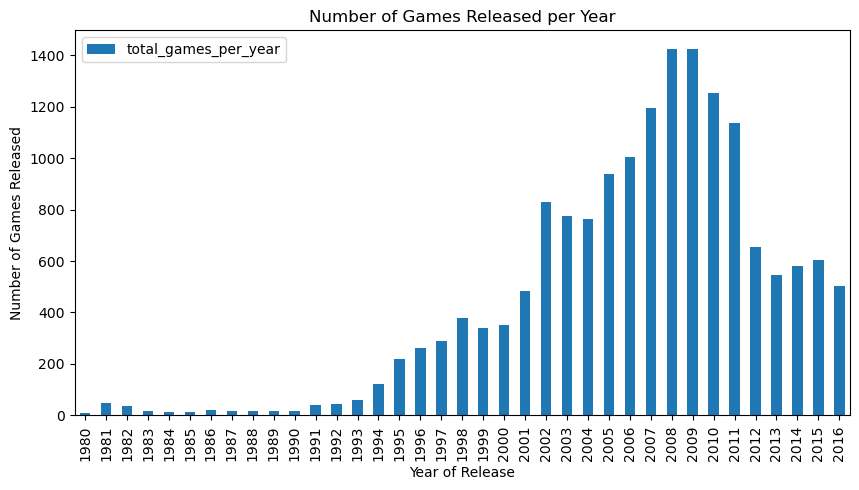

In [118]:
games_per_year = (
    games.groupby('year_of_release')
    .size()
    .reset_index(name='total_games_per_year')
)

games_per_year.plot(
    x='year_of_release',
    y='total_games_per_year',
    kind='bar',
    figsize=(10, 5),
    xlabel='Year of Release',
    ylabel='Number of Games Released',
    title='Number of Games Released per Year'
)


### 3.2 Platform Sales Trends Over Time

We examine how total sales vary across platforms over the years to identify market leaders, declining platforms, and lifecycle patterns.


#### 3.2.1 Identifying Platforms With the Highest Total Sales

We first identify the platforms with the highest total sales to focus on the most commercially significant players in the market.

In [119]:
platform_sales = (
    games.groupby('platform')['total_sales']
    .sum()
    .sort_values(ascending=False)
)

platform_sales.head(10)


platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64

#### 3.2.2 Annual Sales Distribution

The sales trends clearly demonstrate the lifecycle behavior of gaming platforms.

PS2 shows strong sales in the early 2000s, peaking around 2002–2004, followed by a steady decline as newer generations entered the market.

Wii experienced rapid growth after its launch, reaching peak sales around 2009, but declined sharply afterward.

Xbox 360 and PS3 show similar lifecycle patterns, with peak performance between 2008 and 2011, followed by gradual decline.

Nintendo DS peaked around 2007–2008 and then declined as newer handheld systems emerged.

Overall, the data confirms that gaming platforms typically experience:
- A rapid growth phase after launch
- A peak period lasting a few years
- A gradual decline as new generations replace them

This generational cycle suggests that older platform data may not be representative of the market conditions leading into 2017. Therefore, more recent years should be prioritized when building forecasts.


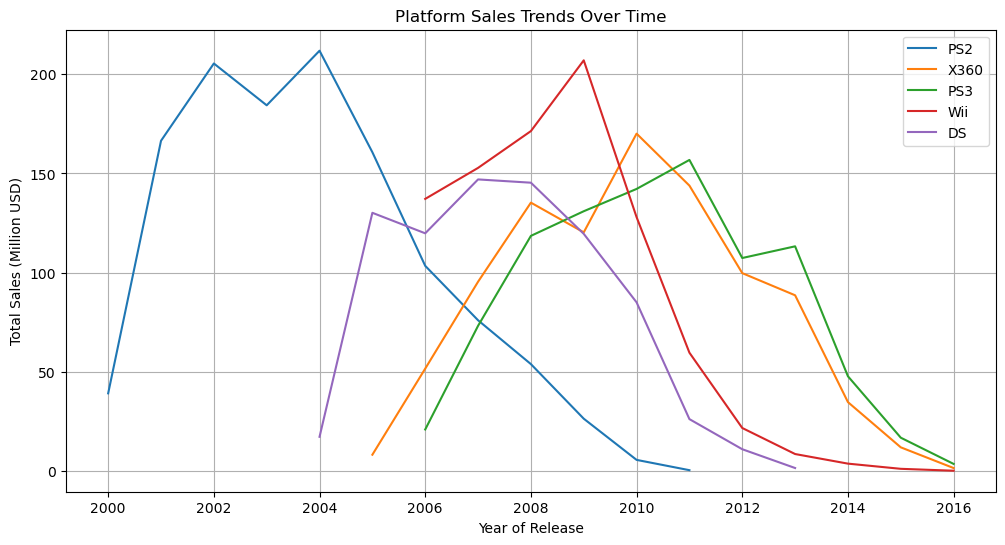

In [120]:
games.loc[15957, 'year_of_release'] = 2007 # (index 15957) was recorded as 1985, the correct release year is 2007

platform_year_sales = (
    games.groupby(['year_of_release', 'platform'])['total_sales']
    .sum()
    .reset_index()
)

top_platforms = platform_sales.head(5).index

plt.figure(figsize=(12, 6))

for platform in top_platforms:
    platform_data = games[games['platform'] == platform]
    
    yearly_sales = (
        platform_data
        .groupby('year_of_release')['total_sales']
        .sum()
    )
    
    plt.plot(yearly_sales.index, yearly_sales.values, label=platform)

plt.title('Platform Sales Trends Over Time')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (Million USD)')
plt.legend()
plt.grid(True)
plt.show()



#### 3.2.3 Finding platforms that have disappeared

Several platforms show no recent sales activity, indicating that they have exited the market.
This reinforces the importance of focusing only on currently active platforms when forecasting 2017.


In [121]:
platform_last_year = (
    games.groupby('platform')['year_of_release']
    .max()
    .sort_values()
)

platform_last_year.head(10)


platform
2600    1989
GG      1992
SCD     1994
GEN     1994
NES     1994
3DO     1995
TG16    1995
NG      1996
PCFX    1996
SNES    1999
Name: year_of_release, dtype: Int64

#### 3.2.4 Calculating the average lifespan of the platform

### Platform Lifecycle Analysis

The lifecycle analysis shows that most gaming platforms remain commercially active for approximately 5 to 11 years.

Major successful platforms such as PS2, PS3, Xbox 360, PSP, and Wii exhibit lifespans of around a decade, with a clear growth phase, peak period, and gradual decline.

Shorter lifecycles (3–5 years) are typically observed for newer platforms (e.g., PS4, Xbox One, WiiU), reflecting that the dataset only captures their early market years.

Older legacy platforms (e.g., NES, SNES, Game Boy) also show multi-year lifespans but belong to fundamentally different market generations.

PC appears as a special case with a much longer lifespan, as it represents an evolving ecosystem rather than a single hardware generation.

Overall, the results confirm that the gaming industry follows a generational replacement cycle, where new platforms emerge roughly every 5–7 years and gradually replace previous ones.

This reinforces the need to focus on recent years when forecasting 2017 sales, as older platform generations no longer reflect current market dynamics.


In [122]:
platform_lifecycle = (
    games.groupby('platform')['year_of_release']
    .agg(['min', 'max'])
)

platform_lifecycle['lifetime'] = (
    platform_lifecycle['max'] - platform_lifecycle['min']
)

platform_lifecycle.sort_values('lifetime', ascending=False)


,min,max,lifetime
platform,,,
PC,1985,2016,31
GB,1988,2001,13
NES,1983,1994,11
X360,2005,2016,11
PSP,2004,2015,11
PS2,2000,2011,11
DC,1998,2008,10
Wii,2006,2016,10
PS3,2006,2016,10


### 3.3 Selecting the Relevant Time Period

Based on the previous analysis, the video game market clearly follows a generational lifecycle pattern. Most platforms remain commercially active for approximately 5–10 years, experiencing growth, peak performance, and eventual decline.

Data from the 1980s and 1990s represent fundamentally different market conditions and platform generations that are no longer relevant to the competitive environment leading into 2017.

Additionally, sales peaked around 2007–2009, and several major platforms began declining after 2011, reflecting generational transition dynamics.

To build a realistic model for forecasting 2017 performance, it is most appropriate to focus on recent market conditions that resemble the current competitive landscape.

Therefore, the analysis will be restricted to data from 2010 onward. This period captures the active lifecycle of modern platforms while excluding outdated market generations that could distort trend analysis.


### 3.4 Filtering Data for the Selected Period

To ensure that only relevant data is used for forecasting 2017, we create a filtered dataset containing games released from 2010 onward. 

The original dataset is preserved to maintain reproducibility and allow comparisons if needed.


In [123]:
recent_games = games[games['year_of_release'] >= 2010].copy()